In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False,logscale=0):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
        
    plt.xticks([])
    plt.yticks([])
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yminorticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_ymajorticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (logscale):
                ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % (math.log(v,10)) )))
def show(nm,a=0,b=0,logscale=0):
    hide_spines(a,b,logscale)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    
    plt.savefig(nm);
    plt.show()
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
#this line is only needed in iPython notebooks
%matplotlib inline

2.6.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(test_labels.shape)
x_train = train_images
y_train = train_labels
x_valid = test_images
y_valid = test_labels
w, h = 28, 28
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)
print(y_valid)
print(y_valid.shape,y_train.shape)

(10000,)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 10) (60000, 10)


In [3]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()
#depth

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

2021-09-01 11:40:16.308244: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:

checkpointer = keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [5]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10


2021-09-01 11:40:16.440909: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


938/938 [==============================] - 22s 23ms/step - loss: 1.2083 - accuracy: 0.6934 - val_loss: 0.4839 - val_accuracy: 0.8216

Epoch 00001: val_loss improved from inf to 0.48393, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 [==============================] - 24s 26ms/step - loss: 0.5488 - accuracy: 0.7962 - val_loss: 0.4090 - val_accuracy: 0.8512

Epoch 00002: val_loss improved from 0.48393 to 0.40904, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 [==============================] - 28s 30ms/step - loss: 0.4807 - accuracy: 0.8243 - val_loss: 0.3882 - val_accuracy: 0.8578

Epoch 00003: val_loss improved from 0.40904 to 0.38816, saving model to model.weights.best.hdf5
Epoch 4/10
938/938 [==============================] - 30s 32ms/step - loss: 0.4389 - accuracy: 0.8379 - val_loss: 0.3534 - val_accuracy: 0.8683

Epoch 00004: val_loss improved from 0.38816 to 0.35338, saving model to model.weights.best.hdf5
Epoch 5/10
938/938 [==============================]

In [6]:
layer_outputs = [layer.output for layer in model.layers] 
# Extracts the outputs of the top 12 layers
activation_model = tf.keras.models.Model(
    inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

0


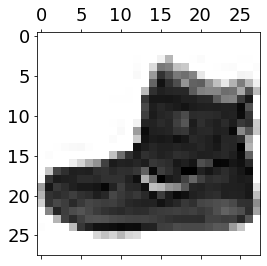

5


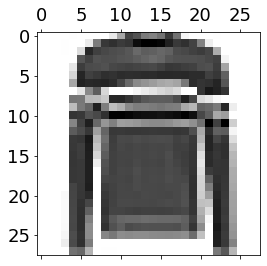

10


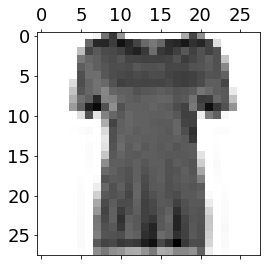

15


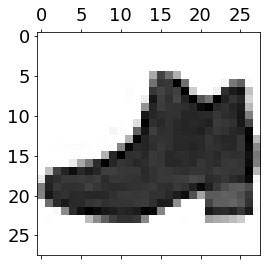

20


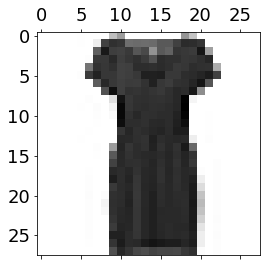

25


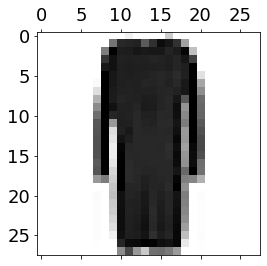

30


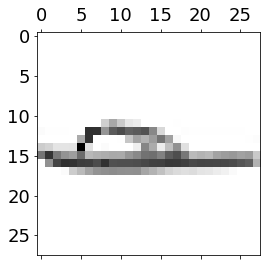

35


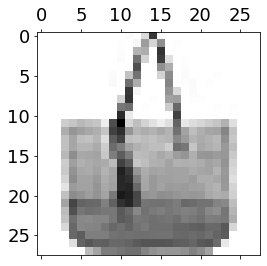

40


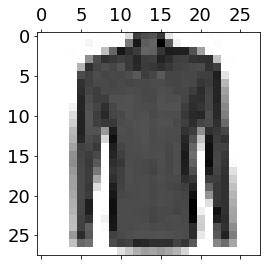

45


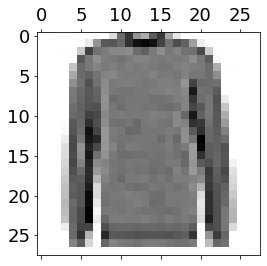

50


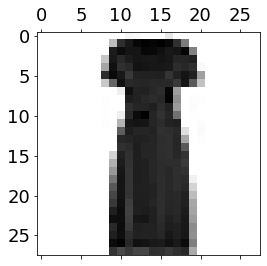

55


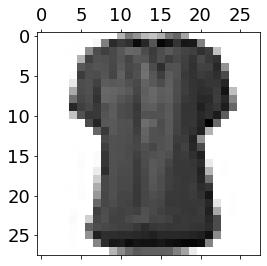

60


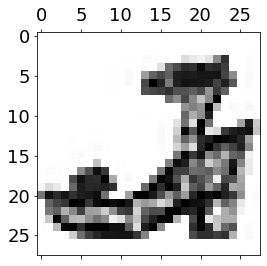

65


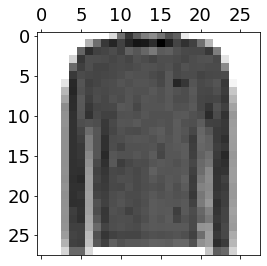

70


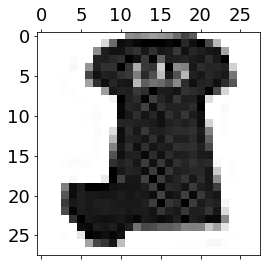

75


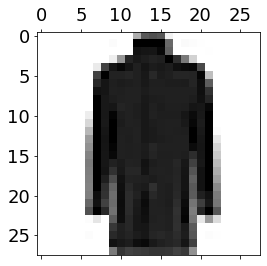

80


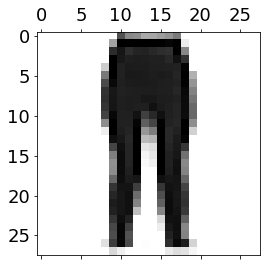

85


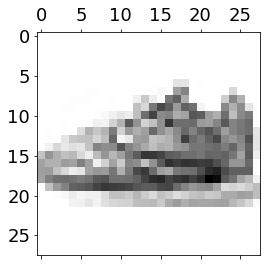

90


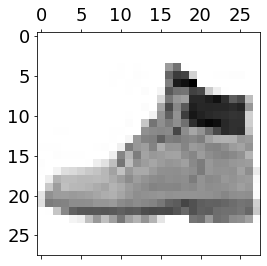

95


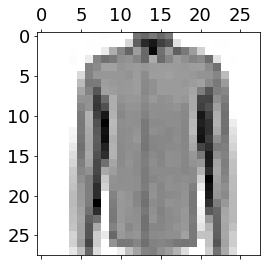

In [7]:
for i in range(0,100,5):
    print(i)
    plt.matshow(x_train[i:(i+1),:,:,:].reshape((28,28)), cmap=plt.cm.binary)
    plt.show()

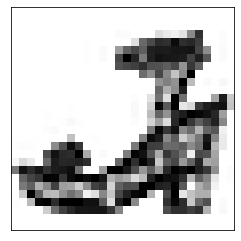

(1, 28, 28, 64)


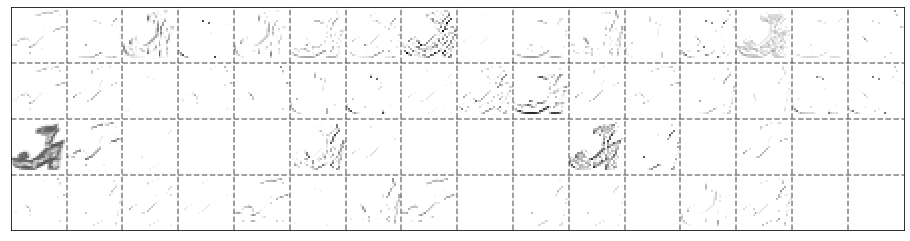

(1, 14, 14, 64)


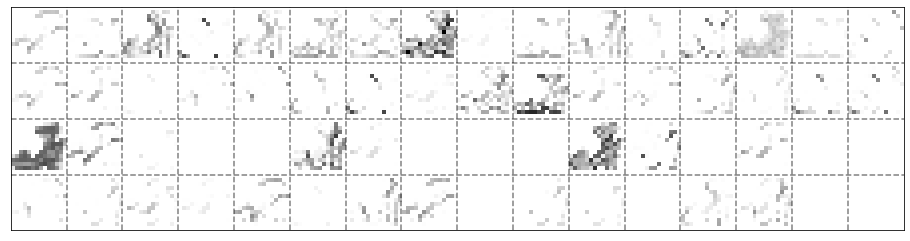

(1, 14, 14, 32)


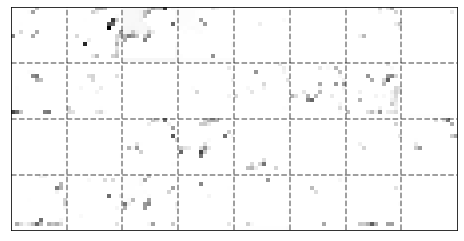

(1, 7, 7, 32)


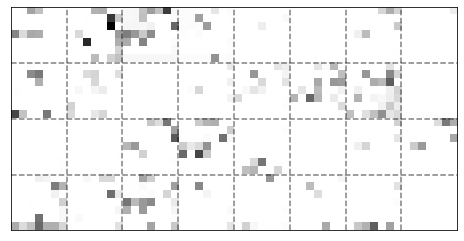

In [9]:
im_num = 60
plt.matshow(x_train[im_num:(im_num+1),:,:,:].reshape((28,28)), cmap=plt.cm.binary)
activations = activation_model.predict(x_train[im_num:(im_num+1),:,:,:])
num_layers = len(activations)
show("fashion-"+str(im_num)+"-orig.pdf")
for I in [0,1,3,4]:
    first_layer_activation = activations[I]
    width = first_layer_activation.shape[2]
    height = first_layer_activation.shape[1]
    print(first_layer_activation.shape)
    layer1 = np.zeros((4*height,(first_layer_activation.shape[-1]//4)*width))
    count = 0
    for i in range(4):
        for j in range(first_layer_activation.shape[-1]//4):
            layer1[i*height:(i+1)*height,j*width:(j+1)*width] = first_layer_activation[0, :, :, count]
            count += 1
    plt.matshow(layer1, cmap=plt.cm.binary)
    for i in range(4):
        for j in range(first_layer_activation.shape[-1]//4):
            if (i==0) and (j>0):
                plt.axvline(x=j*height-0.5, linestyle="--", color="black", alpha=0.5)
        if (i>0):
            plt.axhline(y=i*width-0.5, linestyle="--", color="black", alpha=0.5)
    show("fashion-"+str(im_num)+"-layer-"+str(I)+".pdf")



In [10]:
y_train[60,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)